## US Gun Deaths: Guided Project

In [1]:
import pandas as pd

data = pd.read_csv("guns.csv")
print(data.head())
print(data.dtypes)

   Unnamed: 0  year  month   intent  police sex   age                    race  \
0           1  2012      1  Suicide       0   M  34.0  Asian/Pacific Islander   
1           2  2012      1  Suicide       0   F  21.0                   White   
2           3  2012      1  Suicide       0   M  60.0                   White   
3           4  2012      2  Suicide       0   M  64.0                   White   
4           5  2012      2  Suicide       0   M  31.0                   White   

   hispanic            place  education  
0       100             Home        4.0  
1       100           Street        3.0  
2       100  Other specified        4.0  
3       100             Home        4.0  
4       100  Other specified        2.0  
Unnamed: 0      int64
year            int64
month           int64
intent         object
police          int64
sex            object
age           float64
race           object
hispanic        int64
place          object
education     float64
dtype: object


## Modifying the Dataframe

In [2]:
data = data.drop("Unnamed: 0", axis=1)
data["day"] = 1
print(data.head())

   year  month   intent  police sex   age                    race  hispanic  \
0  2012      1  Suicide       0   M  34.0  Asian/Pacific Islander       100   
1  2012      1  Suicide       0   F  21.0                   White       100   
2  2012      1  Suicide       0   M  60.0                   White       100   
3  2012      2  Suicide       0   M  64.0                   White       100   
4  2012      2  Suicide       0   M  31.0                   White       100   

             place  education  day  
0             Home        4.0    1  
1           Street        3.0    1  
2  Other specified        4.0    1  
3             Home        4.0    1  
4  Other specified        2.0    1  


## Counting Gun Deaths By Year

In [3]:
years = data["year"]

year_counts = {}
for year in years:
    if year not in year_counts:
        year_counts[year] = 1
    else:
        year_counts[year] += 1

print(year_counts)

{2012: 33563, 2013: 33636, 2014: 33599}


## Exploring Gun Deaths By Month And Year

In [4]:
dates = pd.to_datetime(data[['year', 'month', 'day']])
dates.head()

0   2012-01-01
1   2012-01-01
2   2012-01-01
3   2012-02-01
4   2012-02-01
dtype: datetime64[ns]

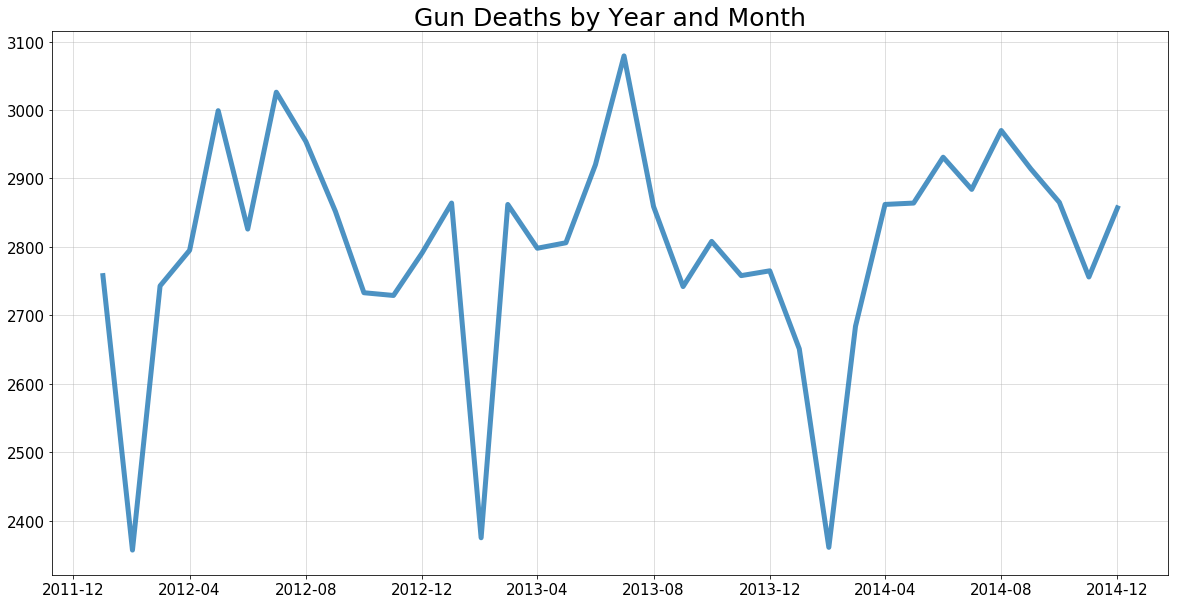

In [5]:
import matplotlib.pyplot as plt

date_counts = {}
for date in dates:
    if date not in date_counts:
        date_counts[date] = 1
    else:
        date_counts[date] += 1

date_counts
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
plt.plot(list(date_counts.keys()), list(date_counts.values()), alpha=0.8, linewidth=5)
ax.set_title("Gun Deaths by Year and Month", size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid(alpha=0.5)
plt.show()

## Exploring Gun Deaths By Race And Sex

{'M': 86349, 'F': 14449}
  Sex  Count
0   M  86349
1   F  14449


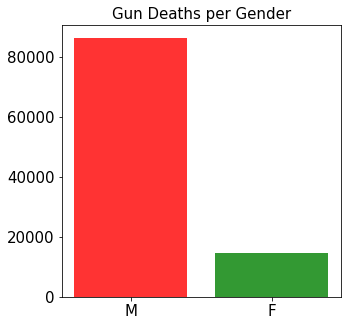

{'Asian/Pacific Islander': 1326, 'White': 66237, 'Native American/Native Alaskan': 917, 'Black': 23296, 'Hispanic': 9022}
                             Race  Count
0          Asian/Pacific Islander   1326
1                           White  66237
2  Native American/Native Alaskan    917
3                           Black  23296
4                        Hispanic   9022


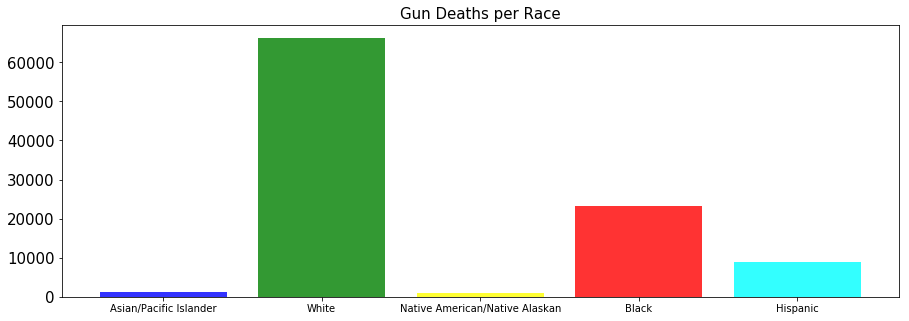

In [6]:
import numpy as np

sexes = data["sex"]
sex_counts = {}
for row in sexes:
    if row not in sex_counts:
        sex_counts[row] = 1
    else:
        sex_counts[row] += 1

print(sex_counts)
sexes_counts = pd.DataFrame([[key,value] for key,value in sex_counts.items()], columns=["Sex","Count"]) 
print(sexes_counts)
bar_x_locations = np.arange(len(sexes_counts["Sex"]))
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
plt.bar(bar_x_locations, sexes_counts["Count"], color=["red", "green"], alpha=0.8)
plt.xticks(bar_x_locations, sexes_counts["Sex"])
ax.set_title("Gun Deaths per Gender", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

races = data["race"]
race_counts = {}
for row in races:
    if row not in race_counts:
        race_counts[row] = 1
    else:
        race_counts[row] += 1
        
print(race_counts)
races_counts = pd.DataFrame([[key,value] for key,value in race_counts.items()],columns=["Race","Count"]) 
print(races_counts)
bar_x_locations = np.arange(len(races_counts["Race"]))
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
plt.bar(bar_x_locations, races_counts["Count"], color=['blue', 'green', 'yellow', 'red', 'cyan'], alpha=0.8)
plt.xticks(bar_x_locations, races_counts["Race"])
ax.set_title("Gun Deaths per Race", size=15)
plt.xticks(size=10)
plt.yticks(size=15)
plt.show()

### Learnings so far:

Looking at the numbers per month, it seems that the death toll by guns were rising during summer.

Data also shows that there is a drastic difference between male and female deaths. It also shows that the White population had the highest number of deaths, while Native American/Native Alaskan population had the least. Having the original census of the US population during that time period would help in getting a better idea.

## Reading In A Second Dataset

In [7]:
census = pd.read_csv("census.csv")
census

,Id,Year,Id.1,Sex,Id.2,Hispanic Origin,Id.3,Id2,Geography,Total,Race Alone - White,Race Alone - Hispanic,Race Alone - Black or African American,Race Alone - American Indian and Alaska Native,Race Alone - Asian,Race Alone - Native Hawaiian and Other Pacific Islander,Two or More Races
0,cen42010,"April 1, 2010 Census",totsex,Both Sexes,tothisp,Total,0100000US,NaN,United States,308745538,197318956,44618105,40250635,3739506,15159516,674625,6984195


## Computing Rates Of Gun Deaths Per Race

In [8]:
mapping = {"Total": 308745538, "Asian/Pacific Islander": 15159516 + 674625, "Native American/Native Alaskan": 3739506, "Black": 40250635, "Hispanic": 44618105, "White": 197318956}
print(race_counts)
race_per_hundredk = {}
for race, count in race_counts.items():
    race_per_hundredk[race] = (count / mapping[race]) * 100000

print(race_per_hundredk)

{'Asian/Pacific Islander': 1326, 'White': 66237, 'Native American/Native Alaskan': 917, 'Black': 23296, 'Hispanic': 9022}
{'Asian/Pacific Islander': 8.374309664161762, 'White': 33.56849303419181, 'Native American/Native Alaskan': 24.521955573811088, 'Black': 57.8773477735196, 'Hispanic': 20.220491210910907}


## Filtering By Intent

{'Asian/Pacific Islander': 3.530346230970155, 'White': 4.6356417981453335, 'Native American/Native Alaskan': 8.717729026240365, 'Black': 48.471284987180944, 'Hispanic': 12.627161104219914}
                             Race       Rate
0          Asian/Pacific Islander   3.530346
1                           White   4.635642
2  Native American/Native Alaskan   8.717729
3                           Black  48.471285
4                        Hispanic  12.627161


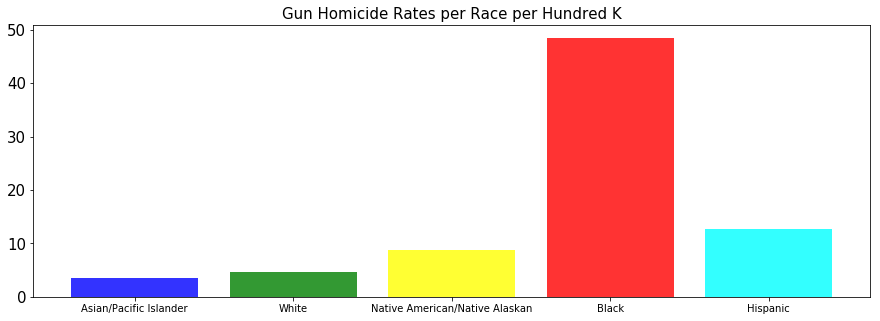

In [9]:
intents = data["intent"]
races = data["race"]

homicide_race_per_hundredk = {}
for i, race in enumerate(races):
    if race not in homicide_race_per_hundredk:
        homicide_race_per_hundredk[race] = 0
    if intents[i] == "Homicide":
        homicide_race_per_hundredk[race] += 1

race_per_hundredk = {}
for race, count in homicide_race_per_hundredk.items():
    race_per_hundredk[race] = (count / mapping[race]) * 100000

print(race_per_hundredk)
races_per_hundredk = pd.DataFrame([[key,value] for key,value in race_per_hundredk.items()],columns=["Race","Rate"]) 
print(races_per_hundredk)
bar_x_locations = np.arange(len(races_per_hundredk["Race"]))
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
plt.bar(bar_x_locations, races_per_hundredk["Rate"], color=['blue', 'green', 'yellow', 'red', 'cyan'], alpha=0.8)
plt.xticks(bar_x_locations, races_per_hundredk["Race"])
ax.set_title("Gun Homicide Rates per Race per Hundred K", size=15)
plt.xticks(size=10)
plt.yticks(size=15)
plt.show()

### Learnings so far:

After comparing the intial numbers aginst the census data, and calculating the deaths per 100K for every race, the interpretations have changed. It now shows that the highest deaths by guns are among the Black population.

Further considerations:

- Intent of deaths by gender
- Police involvement compared to race and gender

## Intent of Deaths by Gender

{'M': 29803, 'F': 5373}
  Gender  Count
0      M  29803
1      F   5373
{'M': 86348, 'F': 14448}
  Gender  Count
0      M  86348
1      F  14448


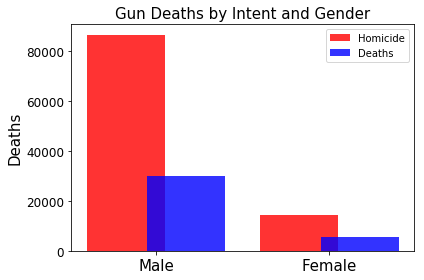

In [10]:
homicide_gender = {}
for i, gender in enumerate(sexes):
    if gender not in homicide_gender:
        homicide_gender[gender] = 0
    if intents[i] == "Homicide":
        homicide_gender[gender] += 1

print(homicide_gender)
homicide_genders = pd.DataFrame([[key,value] for key,value in homicide_gender.items()],columns=["Gender","Count"]) 
print(homicide_genders)

deaths_gender = {}
for i, gender in enumerate(sexes):
    if gender not in deaths_gender:
        deaths_gender[gender] = 0
    else:
        deaths_gender[gender] += 1

print(deaths_gender)
deaths_genders = pd.DataFrame([[key,value] for key,value in deaths_gender.items()],columns=["Gender","Count"]) 
print(deaths_genders)

index = np.arange(len(deaths_genders["Gender"]))
bar_width = 0.35
error_config = {'ecolor': '0.3'}

fig, ax = plt.subplots()

rects1 = plt.bar(index, deaths_genders["Count"], width=0.45, color='red', error_kw=error_config, alpha=0.8, label="Homicide")

rects2 = plt.bar(index+bar_width, homicide_genders["Count"], width=0.45, color='blue', error_kw=error_config, alpha=0.8, label="Deaths")

plt.ylabel('Deaths', size=15)
plt.title('Gun Deaths by Intent and Gender', size=15)
plt.xticks(index + bar_width/2, ('Male', 'Female'))
plt.xticks(size=15)
plt.yticks(size=12)
plt.legend()

plt.tight_layout()
plt.show()

### Learnings so far:

It appears that the Male Homicide are 5.5 times greater than that of Females. And the overall gun death death of Males are almost 6 times greater than that of Females.

## Police Involvement

{'Asian/Pacific Islander': 30, 'White': 709, 'Native American/Native Alaskan': 25, 'Black': 356, 'Hispanic': 282}
                             Race      Rate
0          Asian/Pacific Islander  0.189464
1                           White  0.359317
2  Native American/Native Alaskan  0.668538
3                           Black  0.884458
4                        Hispanic  0.632030


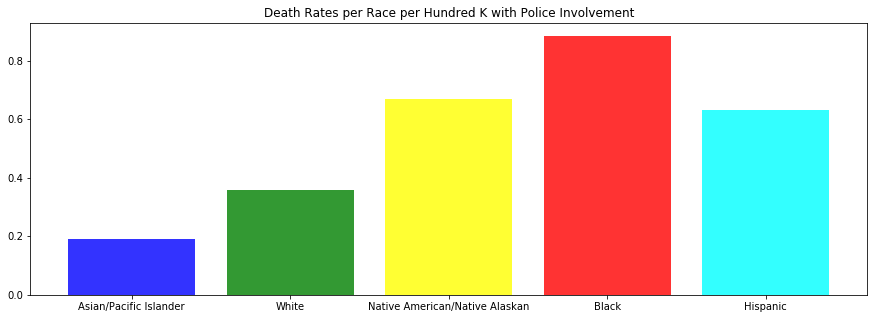

In [11]:
intents = data["intent"]
races = data["race"]
police_inv = data["police"]

police_per_race = {}
for i, race in enumerate(races):
    if race not in police_per_race:
        police_per_race[race] = 0
    if police_inv[i] == 1:
        police_per_race[race] += 1

race_per_hundredk = {}
for race, count in police_per_race.items():
    race_per_hundredk[race] = (count / mapping[race]) * 100000
    
print(police_per_race)
police_per_races = pd.DataFrame([[key,value] for key,value in race_per_hundredk.items()],columns=["Race","Rate"]) 
print(police_per_races)

bar_x_locations = np.arange(len(police_per_races["Race"]))
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
plt.bar(bar_x_locations, police_per_races["Rate"], color=['blue', 'green', 'yellow', 'red', 'cyan'], alpha=0.8)
plt.xticks(bar_x_locations, police_per_races["Race"])
ax.set_title("Death Rates per Race per Hundred K with Police Involvement")
plt.show()